<a href="https://colab.research.google.com/github/Uemerson/time-series-forecasting-lstm-shampoo-sales/blob/main/time_series_forecasting_lstm_shampoo_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial - Time Series Forecasting With LSTM in Python

shampoo sales dataset: https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv

tutorial from: https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/

In [1]:
# import required libraries
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


#Load and plot dataset

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


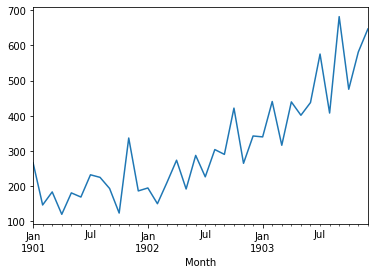

In [2]:
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

# summarize first few rows
print(series.head())

# line plot
series.plot()
pyplot.show()

#Persistence Model Forecast

RMSE: 136.761


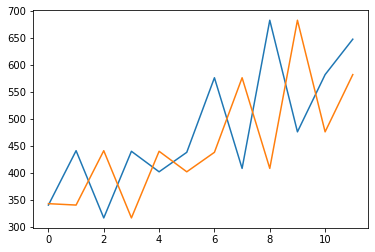

In [3]:
# split data into train and test
X = series.values
train, test = X[0:-12], X[-12:]

# walk-forward validation
history = [x for x in train]

predictions = list()
for i in range(len(test)):
	# make prediction
	predictions.append(history[-1])
	# observation
	history.append(test[i])

# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

# line plot of observed vs predicted
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()